# Install Necessary Packages

In [2]:
!pip install numpy matplotlib tensorflow opencv-python

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model 

In [4]:
train_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\Plants_2\\train'
val_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\Plants_2\\valid'
test_image_path = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\Plants_2\\test\\Basil healthy (P8)\\0008_0001.JPG'
model_path = 'plant_recognition_model_v2_3.keras'

# Hyper Parameters

In [6]:
IMAGE_SIZE = 128  # Input size for the model
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 20  # Adjust based on your dataset

# Check if the model already exists

In [8]:
if os.path.exists(model_path):
    print("Loading saved model...")
    model = load_model(model_path)
else:
    print("Training new model...")


Training new model...


# Data Generators with augmentation

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only Rescaling for Validation Set
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4274 images belonging to 22 classes.
Found 110 images belonging to 22 classes.


# Number of Classes

In [12]:
n_classes = train_generator.num_classes  # Adjust based on the number of classes in your dataset
print(f"Training classes: {train_generator.num_classes}, Validation classes: {val_generator.num_classes}")

Training classes: 22, Validation classes: 22


# Model Architecture

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model

In [16]:
history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator
    )


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.0948 - loss: 2.9383 

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 1643s 12s/step - accuracy: 0.0952 - loss: 2.9369 - val_accuracy: 0.2636 - val_loss: 2.4038
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1534s 11s/step - accuracy: 0.3363 - loss: 2.1056 - val_accuracy: 0.4273 - val_loss: 1.7528
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1655s 12s/step - accuracy: 0.4831 - loss: 1.6434 - val_accuracy: 0.5909 - val_loss: 1.3552
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 2035s 15s/step - accuracy: 0.5669 - loss: 1.3389 - val_accuracy: 0.6182 - val_loss: 1.3186
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1584s 12s/step - accuracy: 0.6291 - loss: 1.1677 - val_accuracy: 0.6455 - val_loss: 1.3539
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1500s 11s/step - accuracy: 0.6529 - loss: 1.0585 - val_accuracy: 0.6364 - val_loss: 1.2180
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1497s 11s/step - accuracy: 0.6862 - loss: 0.9421 - val_accuracy: 0.6091 - val_loss: 1.3258
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1498s 11s/step - accuracy: 0.6887 - loss: 0.9003 - val

# Save the model

In [18]:
model.save(model_path)
print("Model trained and saved.")

Model trained and saved.


# Evaluate the model

In [20]:
try:
    val_loss, val_accuracy = model.evaluate(val_generator)
    print(f"Validation Accuracy: {val_accuracy:.2f}")
except NameError:
    print("Validation data not loaded; skipping evaluation.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.7206 - loss: 1.0998
Validation Accuracy: 0.72


# Test model with sample image

In [22]:
prepared_image = image.img_to_array(image.load_img(test_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))) / 255.0
prepared_image = np.expand_dims(prepared_image, axis=0)
prediction = model.predict(prepared_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


# Get Class Label

In [24]:
# Assuming prediction is the output from the model prediction
class_labels = list(train_generator.class_indices.keys()) if 'train_generator' in locals() else None

# Get the index of the predicted class
predicted_class = np.argmax(prediction, axis=1)

if class_labels:
    predicted_class_name = class_labels[predicted_class[0]]
    confidence = prediction[0][predicted_class[0]]
    print(f"Predicted Class: {predicted_class_name} with Confidence: {confidence:.2f}")
else:
    class_index = predicted_class[0]
    confidence = prediction[0][class_index]
    print(f"Predicted Class Index: {class_index} with Confidence: {confidence:.2f}")


Predicted Class: Basil healthy (P8) with Confidence: 0.63


# Visualize the prediction

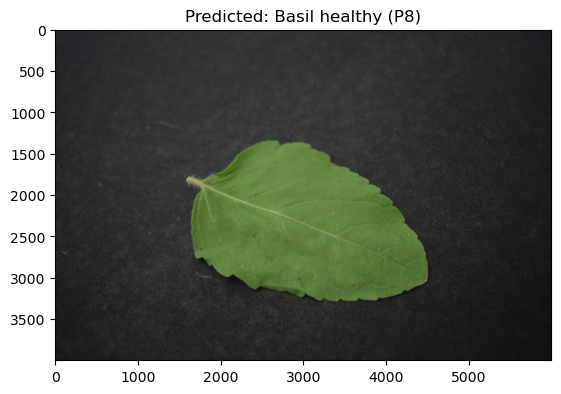

In [26]:
plt.imshow(image.load_img(test_image_path))
plt.title(f"Predicted: {class_labels[predicted_class[0]] if class_labels else predicted_class[0]}")
plt.show()